## Workbook 2: Computer Vision Neural Networks


This notebook contains practice exercises on developing TensorFlow neural network models for computer vision tasks

Solutions for this workbook can be found [here](./2-workbook-solutions.ipynb)

----

Load in `os`, `numpy`, `tensorflow`, `maplotlib`, and `scikit-learn` packages

In [21]:
# Load necessary packages for this lesson
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn

## Exercise 1: Developing an image classification neural network for the CIFAR10 dataset

During this exercise you walk through the basic machine learning workflow in creating an image classification neural network to apply to the CIFAR10 dataset

### Exercise 1.1: Load the data

Load in the CIFAR10 dataset (see [this Wiki](https://en.wikipedia.org/wiki/CIFAR-10) for more info on the dataset) using the built-in TensorFlow datasets *tf.keras.datasets* (view [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) to see all readily available datasets)

In [22]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

### Exercise 1.2: Inspect the data

#### Exercise 1.2.1

Find the shape and datatype of this data and use these values to answer the questions that follow

In [23]:
def print_info(dataset):
	print(f'Shape: {dataset.shape} | Data Type {dataset.dtype} \n')

print_info(train_x)
print_info(train_y)
print_info(test_x)
print_info(test_y)

Shape: (50000, 32, 32, 3) | Data Type uint8 

Shape: (50000, 1) | Data Type uint8 

Shape: (10000, 32, 32, 3) | Data Type uint8 

Shape: (10000, 1) | Data Type uint8 



(Double click this cell to edit and add in your answers)

##### Question 1. How many training samples are in this dataset?

Answer: 50,000

##### Question 2. How many testing samples are in this dataset?

Answer: 10,000

##### Question 3. What is the shape of the images we want to classify? Are these color images or black and white images?

Answer: Color images of shape 32x32x3, i.e. 32 pixels tall, by 32 pixels wide with 3 color channels

##### Questions 4. How are the images in the training and testing datasets labeled? Will we be required to One-Hot encode the labels?

Answer: The images are labeled with single numbers, which we can see since the shape of *train_y* is 50,000 samples by 1 indicating that we have a single number label for each of the 50,000 train images. Similarly, the shape of *test_y* is 10,000 samples by 1 indicating that we have a single number label for each of the 10,000 test images. Yes, we will need to One-Hot encode these labels into probability vectors.

#### Exercise 1.2.2

Find some statistical information for our images including the minimum, maximum, and mean. Use this info to answer the questions that follow.

In [24]:
def print_stats(dataset):
	max_value = tf.math.reduce_max(dataset)
	min_value = tf.math.reduce_min(dataset)
	mean_value = tf.math.reduce_mean(dataset)
	median_value = np.median(dataset)
	std_value = tf.math.reduce_std(tf.cast(dataset, dtype='float32'))

	print(f"Max: {max_value}")
	print(f"Min: {min_value}")
	print(f"Mean: {mean_value}")
	print(f"Median: {median_value}")
	print(f"Standard Deviation: {std_value}")

print_stats(train_x)
print_stats(test_x)

Max: 255
Min: 0
Mean: 120
Median: 117.0
Standard Deviation: 64.15007781982422
Max: 255
Min: 0
Mean: 121
Median: 117.0
Standard Deviation: 64.06096649169922


(Double click this cell to edit and add in your answers)

##### Question 1. What is the minimum and maximum pixel values of the images in the dataset?

Answer: Minimum of 0 and maximum of 255

##### Question 2. Should we preprocess these images? Why or why not?

Answer: Yes because the range of input values is very large which will cause performance issues if we do not preprocess

#### Exercise 1.2.3

Calculate how many unique classes of images are in this dataset. *Hint: count how many different numbers occur in the image labels*

In [25]:
# Solution 1: Brute force. Iterate through labels save new ones to a list.

unique_labels = []
for label in train_y:
	if label not in unique_labels:
		unique_labels.append(label)

num_classes = len(unique_labels)
print(f'Number of Classes {num_classes}')

Number of Classes 10


In [26]:
# Solution 2: Convert from an array to a set which removes all duplicates
num_classes = len(set(np.squeeze(train_y, axis=-1))) # calculate number of classes
print(f'Number of Classes {num_classes}')

Number of Classes 10


#### Exercise 1.2.4

Plot a handful of images. What do the objects in these images appear to be? What classes might you assign these images? Try to find images from at least three different classes.

*Note: these images will appear grainy and very low quality because they are. A typical image on your phone will be around the size 2000x1000x3 (i.e., 2000 pixels tall and 1000 pixels wide), but these images only have 32 pixels in height and width making them of significantly lower resolution.*

*Note 2: the input **cmap='gray'** to the plot command **imshow** can be removed as we have color images*

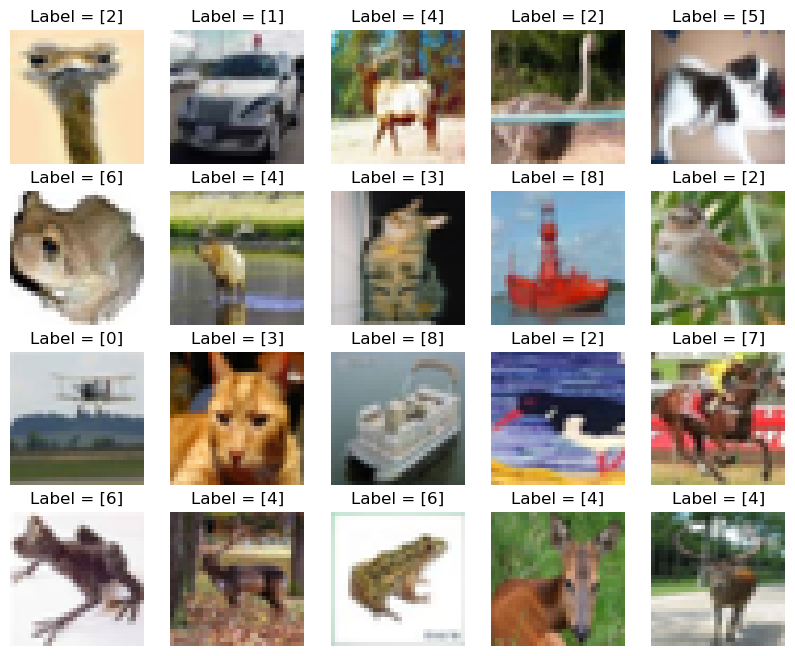

In [27]:
sample_size=20
np.random.seed(2)

# Randomly sample indices
sample_indices = np.random.choice(np.arange(train_x.shape[0]), size=sample_size, replace=False)
# Calculate optimal number of rows and columns
num_columns = int(np.ceil(np.sqrt(sample_size)))
num_rows = int(np.ceil(sample_size / num_columns))
# Plot images
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))
axes = axes.flatten()
for ax, idx in zip(axes, sample_indices):
	ax.imshow(train_x[idx])
	ax.set_title(f'Label = {train_y[idx]}')
	ax.axis('off')
# Hide any remaining empty axes
for i in range(len(sample_indices), len(axes)):
	axes[i].axis('off')
plt.show()

A few of the classes in the dataset include: Frogs, Cats, Planes, and Boats

#### Exercise 1.2.5

If you determined that we should preprocess the images in Exercise 1.2.2, perform a unitization preprocessing on both the train and testing images and then calculate the minimum and maximum of the preprocessed data to check your preprocessing worked as expected. *Note: if you preprocess, do not forget to convert the image datasets to **float32** first*

In [28]:
# Convert from uint8 to float32
train_x = tf.cast(train_x, dtype='float32')
test_x = tf.cast(test_x, dtype='float32')

# Standardize
train_x = train_x/255.0
test_x = test_x/255.0

In [29]:
print_stats(train_x)
print_stats(test_x)

Max: 1.0
Min: 0.0
Mean: 0.4733630120754242
Median: 0.4588235318660736
Standard Deviation: 0.2515689432621002
Max: 1.0
Min: 0.0
Mean: 0.47658494114875793
Median: 0.4588235318660736
Standard Deviation: 0.2512194812297821


#### Exercise 1.2.6

If you determined that we need to reexpress the image lables into a One-Hot probability vector, perform that conversion. *Recall that **tf.one_hot** expects a 1d array of numbers as input and right now the labels are 2d arrays and you will need to remove any dimensions of size 1, which you can do by indexing or using **np.squeeze*** 

Print the first 3 labels in the train and test label datasets before you convert and after you convert

In [30]:
# Change labels into a 1d array by removing the uneeded final dimension of size 1
train_y = np.squeeze(train_y, axis=-1) # or train_y=train_y[:,0]
test_y = np.squeeze(test_y, axis=-1) # or test_y=test_y[:,0]

print(f'Old Train Labels \n {train_y[0:3]} \n')
print(f'Old Test Labels \n {test_y[0:3]} \n')

train_y = tf.one_hot(train_y, num_classes)
test_y = tf.one_hot(test_y, num_classes)

print(f'New Train Labels \n {train_y[0:3]}')
print(f'New Test Labels \n {test_y[0:3]}')

Old Train Labels 
 [6 9 9] 

Old Test Labels 
 [3 8 8] 

New Train Labels 
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
New Test Labels 
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


#### Exercise 1.2.7

Split the data into a training, testing, and validataion subsets. Use the same number of data samples for the testing and validation datasets. Calculate the shapes of the training, testing, and validataion sets to ensure they have the number of samples you are expecting.

In [31]:
# Our dataset is already split into train and test sets, we just need to take the validataion data from the existing train data

# Take final 10000 samples as the validataion data
val_x = train_x[-10000:]
val_y = train_y[-10000:]

# Remove the validataion data from the training data
train_x = train_x[:-10000]
train_y = train_y[:-10000]

In [32]:
print_info(train_x)
print_info(train_y)
print_info(val_x)
print_info(val_y)
print_info(test_x)
print_info(test_y)

Shape: (40000, 32, 32, 3) | Data Type <dtype: 'float32'> 

Shape: (40000, 10) | Data Type <dtype: 'float32'> 

Shape: (10000, 32, 32, 3) | Data Type <dtype: 'float32'> 

Shape: (10000, 10) | Data Type <dtype: 'float32'> 

Shape: (10000, 32, 32, 3) | Data Type <dtype: 'float32'> 

Shape: (10000, 10) | Data Type <dtype: 'float32'> 



#### Exercise 1.2.8

Create a TensorFlow Sequential model (either a Dense network or Convolutional network your choice) to classify the input CIFAR10 images into the 10 categories. Compile and build your model. You are welcome to use any appropriate loss function or optimizer. I would recommend using the 'accuracy' metric, you can however add additional metrics if you so wish.

*Note: If you use convolutional layers the layer **tf.keras.layers.Reshape** used in the lesson is no longer necessary because our input images already have the final color channel axis*

In [38]:
layers = [
	tf.keras.layers.Flatten(), # flatten input images into a long vector
	tf.keras.layers.Dense(64, activation='relu'),	# apply a dense layer mapping an input vector into a vector of dimension 64 then apply a ReLU activation function
	tf.keras.layers.Dense(32, activation='relu'),	# apply a dense layer mapping an input vector into a vector of dimension 32 then apply a ReLU activation function
	tf.keras.layers.Dense(16, activation='relu'),	# apply a dense layer mapping an input vector into a vector of dimension 16 then apply a ReLU activation function
	tf.keras.layers.Dense(num_classes, activation='softmax')	# apply a dense layer mapping an input vector of dimension 16 into a vector of dimension 10 then apply a Softmax activation function. Softmax converts a vector of values into a vector of probabilities
]

model = tf.keras.Sequential(layers)

loss_function = tf.keras.losses.CategoricalCrossentropy() # This is a common loss function for classification neural networks and provides another way to measure error between the network output probability vectors and the true probability vectors
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # the learning rate is essentially the gradient descent "step size"
metrics = [
	'accuracy'
] # metrics are provided as a list and each metric in the list will be evaluated

model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics) # compile the model by assigning it a loss function, optimizer, and (optionally) metrics

#### Exercise 1.2.9

Build and display a summary of your model

In [39]:
_ = model(train_x[0:5]) # provide first 5 images as input

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (5, 3072)                 0         
                                                                 
 dense_6 (Dense)             (5, 64)                   196672    
                                                                 
 dense_7 (Dense)             (5, 32)                   2080      
                                                                 
 dense_8 (Dense)             (5, 16)                   528       
                                                                 
 dense_9 (Dense)             (5, 10)                   170       
                                                                 
Total params: 199,450
Trainable params: 199,450
Non-trainable params: 0
_________________________________________________________________


#### Exercise 1.2.10

Train your model using *model.fit*. If you wish to save the model weights from your training use the "Create folder where we will save the training results" code from the lesson and use the same callbacks from the lesson. You can choose the batch size and number of epochs. Use the training history returned by *model.fit* to plot the training and validataion losses and accuracy.

*Note it is likely you will not see anywhere near as nice accuracy scores on this dataset compared to what was shown in the lesson. This is because the MNIST dataset from the lesson is a very easy image dataset to pickup patterns from compared to this CIFAR10 dataset. You may need to use many more epochs that what was used in the lesson as well.*

In [42]:
history = model.fit(train_x, train_y, batch_size=256, epochs=50, validation_data=(val_x, val_y))

Epoch 1/250
157/157 [==============================] - 1s 8ms/step - loss: 1.4416 - accuracy: 0.4825 - val_loss: 1.5355 - val_accuracy: 0.4519
Epoch 2/250
157/157 [==============================] - 1s 5ms/step - loss: 1.4385 - accuracy: 0.4818 - val_loss: 1.5554 - val_accuracy: 0.4436
Epoch 3/250
157/157 [==============================] - 1s 6ms/step - loss: 1.4364 - accuracy: 0.4828 - val_loss: 1.5395 - val_accuracy: 0.4474
Epoch 4/250
157/157 [==============================] - 1s 5ms/step - loss: 1.4331 - accuracy: 0.4832 - val_loss: 1.5586 - val_accuracy: 0.4384
Epoch 5/250
157/157 [==============================] - 1s 5ms/step - loss: 1.4356 - accuracy: 0.4815 - val_loss: 1.5551 - val_accuracy: 0.4473
Epoch 6/250
157/157 [==============================] - 1s 5ms/step - loss: 1.4236 - accuracy: 0.4879 - val_loss: 1.5577 - val_accuracy: 0.4485
Epoch 7/250
157/157 [==============================] - 1s 5ms/step - loss: 1.4215 - accuracy: 0.4893 - val_loss: 1.5336 - val_accuracy: 0.4523

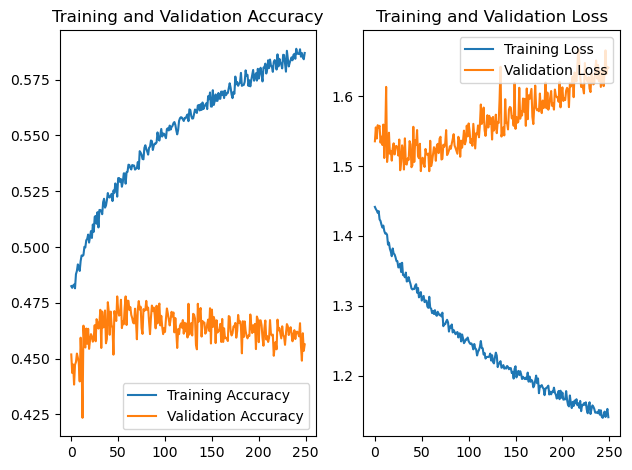

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

#### Exercise 1.2.11

Test your model using *model.evaluate*

In [44]:
test_errors = model.evaluate(test_x, test_y, batch_size=256, return_dict=True)
print(test_errors)

40/40 [==============================] - 1s 16ms/step - loss: 1.6514 - accuracy: 0.4594
{'loss': 1.6513901948928833, 'accuracy': 0.4593999981880188}


#### Exercise 1.2.12

Tune your model by creating, training, and testing at least 3 variations on your origin model. As reminder things you can change include
1. Hidden layer sizes
2. Number of layers
3. Type of layers
4. Loss function
5. Optimizer

You can use the function *train_and_test* from the file *train_img_classification_net.py* as was done in the lesson. However, you may need to edit the file *train_img_classification_net.py* if you wish to change the loss function or optimizer.

Which of your models performs the best? Why do you think that particular model performed the best for you?

In [46]:
from train_img_classification_net import train_and_test

In [48]:
layers = [
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), # 3x3 convolution creating images with 32 filter channels. That is, the output is an tensor of shape 32x32x32
	tf.keras.layers.Flatten(), # flatten images into a long vector
	tf.keras.layers.Dense(num_classes, activation='softmax')	# apply a dense layer mapping an input vector into a vector of dimension 10 then apply a Softmax activation function
]

model = tf.keras.Sequential(layers)

test_results = train_and_test(model, (train_x, train_y), (test_x, test_y), (val_x, val_y), learning_rate=0.001, batch_size=256, epochs=50)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (5, 32, 32, 32)           896       
                                                                 
 flatten_5 (Flatten)         (5, 32768)                0         
                                                                 
 dense_11 (Dense)            (5, 10)                   327690    
                                                                 
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 5s 29ms/step - loss: 0.0732 - accuracy: 0.4072 - val_loss: 0.0669 - val_accuracy: 0.4782
Epoch 2/50
157/157 [==============================] - 4s 25ms/step - loss: 0.0613 - accuracy: 0.5316 - val_loss: 0.0616 - val_accuracy: 0.5253
Epoch 3/50
157/157 [======

In [ ]:
layers = [
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), # 3x3 convolution creating images with 32 filter channels. That is, the output is an tensor of shape 32x32x32
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), # 3x3 convolution creating images with 32 filter channels. That is, the output is an tensor of shape 32x32x32
	tf.keras.layers.Flatten(), # flatten images into a long vector
	tf.keras.layers.Dense(num_classes, activation='softmax')	# apply a dense layer mapping an input vector into a vector of dimension 10 then apply a Softmax activation function
]

model = tf.keras.Sequential(layers)

test_results = train_and_test(model, (train_x, train_y), (test_x, test_y), (val_x, val_y), learning_rate=0.001, batch_size=256, epochs=50)

In [ ]:
layers = [
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), # 3x3 convolution creating images with 32 filter channels. That is, the output is an tensor of shape 32x32x32
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), # 3x3 convolution creating images with 32 filter channels. That is, the output is an tensor of shape 32x32x32
	tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'), # 3x3 convolution creating images with 32 filter channels. That is, the output is an tensor of shape 32x32x32
	tf.keras.layers.Conv2D(3, 3, padding='same', activation='relu'), # 3x3 convolution creating images with 32 filter channels. That is, the output is an tensor of shape 32x32x3
	tf.keras.layers.Flatten(), # flatten images into a long vector
	tf.keras.layers.Dense(num_classes, activation='softmax')	# apply a dense layer mapping an input vector into a vector of dimension 10 then apply a Softmax activation function
]

model = tf.keras.Sequential(layers)

test_results = train_and_test(model, (train_x, train_y), (test_x, test_y), (val_x, val_y), learning_rate=0.001, batch_size=256, epochs=50)